# Heat Flow

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.sparse as sp

In [77]:
%matplotlib notebook

## Problem 1

Consider the specific initial boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time. Plot $U^0$ and $U^4$ and compare with Figures 8.1 and 8.2.

In [124]:
def ibvp(nu, a, b, T, f, n_x, n_t, i):
    """
    Function that solves heat flow equation in one dimension
    with appropriate initial conditions and homogeneous Dirichlet
    boundary conditions.
    It is of the form:
    u_t = ν*u_xx, x ∈ [a, b], t ∈ [0, T],
    u(a,t) = 0, u(b,t) = 0,
    u(x,0) = f(x)
    
    Parameters:
    nu: float
        ν of the PDE
    a: float
        initial value of x
    b: float
        final value of x
    T: float
        final value of t
    f: callable function
        function f in the equation u(x,0) = f(x)
    n_x: int
        number of x subintervals
    n_t: int
        number of t subintervals
    i: int
        Integer value of the specific time value to return
    
    Returns:
    U_i: ndarray
        array containing x information at timestep i
    """
    i = (n_t + i) % n_t
    x = np.linspace(a, b, n_x + 1)
    t = np.linspace(0, T, n_t + 1)
    h = x[1] - x[0] # x stepsize
    k = t[1] - t[0] # t stepsize
    lmda = nu * k / h**2
    U = f(x)
    A = sp.diags([lmda, 1-2*lmda, lmda], [-1, 0, 1], shape=(n_x+1, n_x+1))
    for j in range(i):
        U = A@U
    return U

<IPython.core.display.Javascript object>


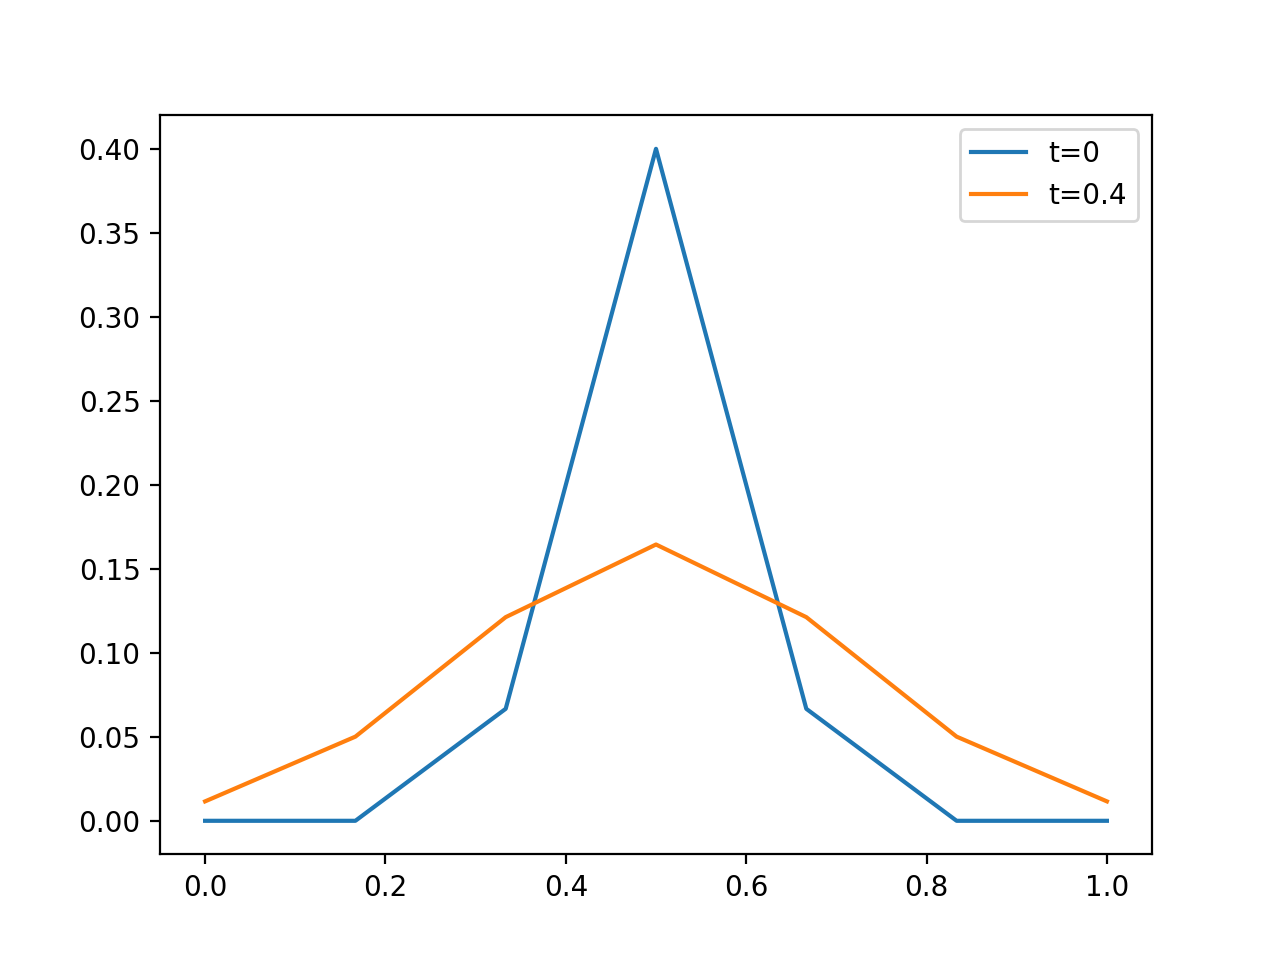

In [125]:
# Solve for U
nu = .05
a = 0
b = 1
T = 1
n_x = 6
n_t = 10
f = lambda x: 2*np.maximum(.2 - np.abs(x - .5), 0)
u0 = ibvp(nu, a, b, T, f, n_x, n_t, 0)
u4 = ibvp(nu, a, b, T, f, n_x, n_t, 4)

# Plot
fig = plt.figure()
x = np.linspace(a, b, n_x+1)
plt.plot(x, u0, label="t=0")
plt.plot(x, u4, label="t=0.4")
plt.legend()
plt.show()

## Problem 2

Solve the specific initial boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method 8.1.
Use 140 subintervals in the $x$ dimension and 70 subintervals in time. Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method 8.1 the CFL condition that must be satisfied is that

 $$\lambda \leq \frac{1}{2}.$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate your results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.

<IPython.core.display.Javascript object>


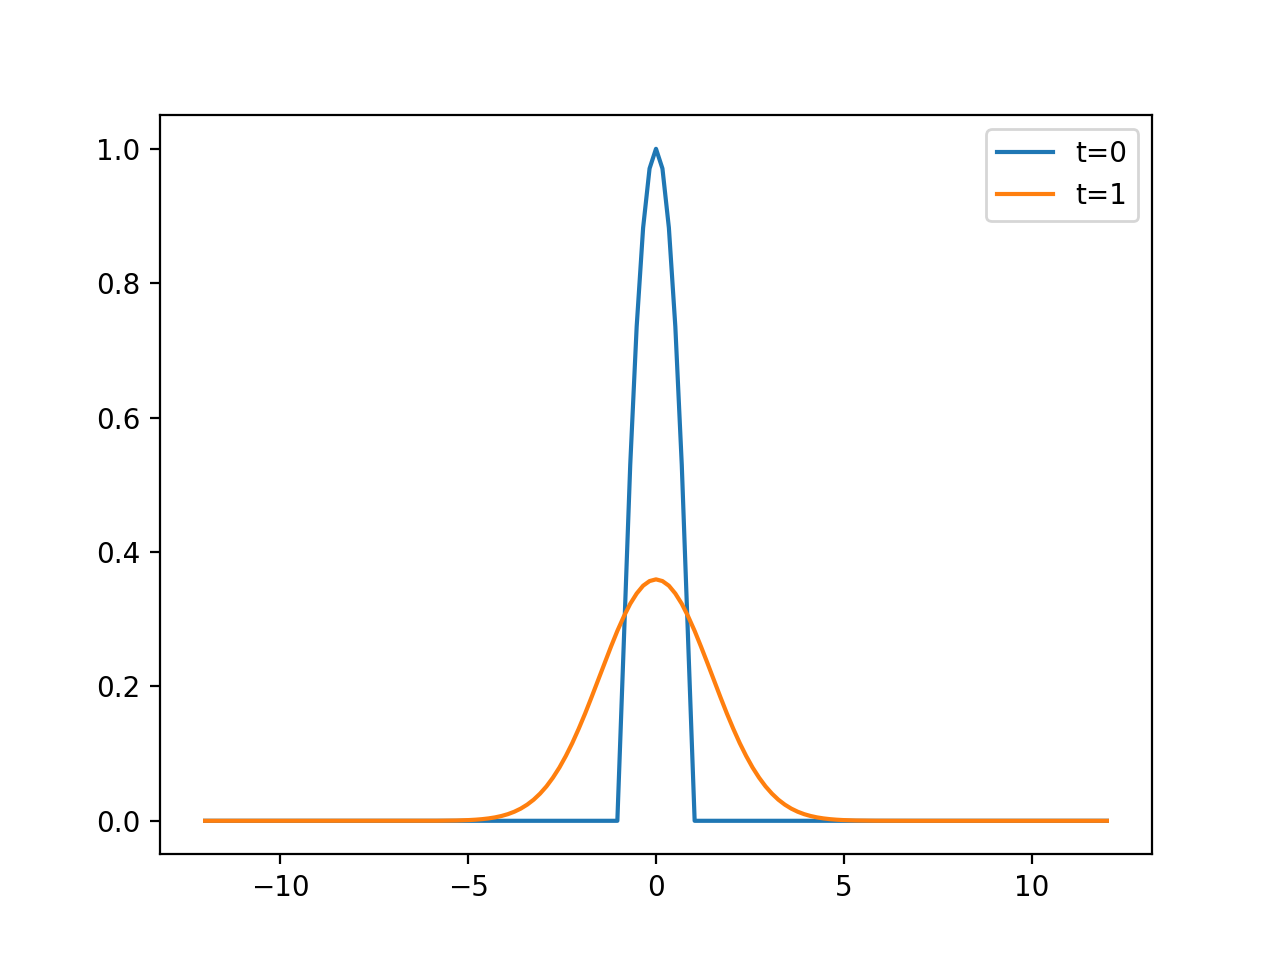

In [126]:
# Solve for U
a,b = -12,12
T = 1
f = lambda x: np.maximum(1 - x**2, 0)
nu = 1
n_x = 140
n_t = 70
u0 = ibvp(nu, a, b, T, f, n_x, n_t, 0)
uf = ibvp(nu, a, b, T, f, n_x, n_t, -1)

# Plot
fig = plt.figure()
x = np.linspace(a, b, n_x+1)
plt.plot(x, u0, label="t=0")
plt.plot(x, uf, label="t=1")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


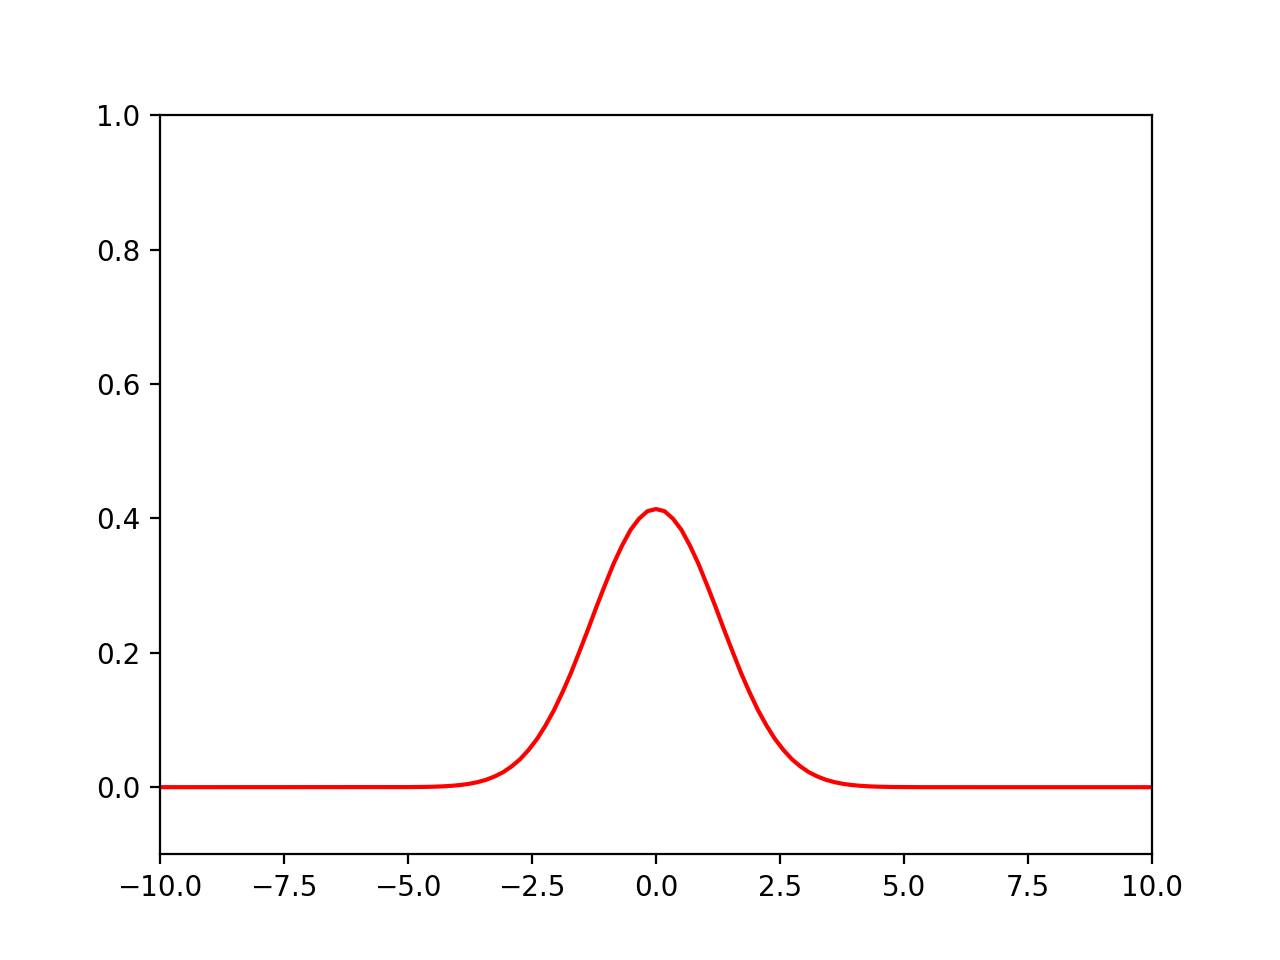

In [127]:
# Animate Problem 2 for t = [0,1] with t-stepsize 70
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-10, 10))
ax.set_ylim((-0.1, 1))
particle, = plt.plot([],[], marker='o', color='r')
traj, = plt.plot([],[], color='r')

def update(i):
    u = ibvp(nu, a, b, T, f, n_x, n_t, i)
    traj.set_data(x, u)
    return particle, traj

ani = animation.FuncAnimation(fig, update, frames=range(70), interval=25)
plt.show()


<IPython.core.display.Javascript object>


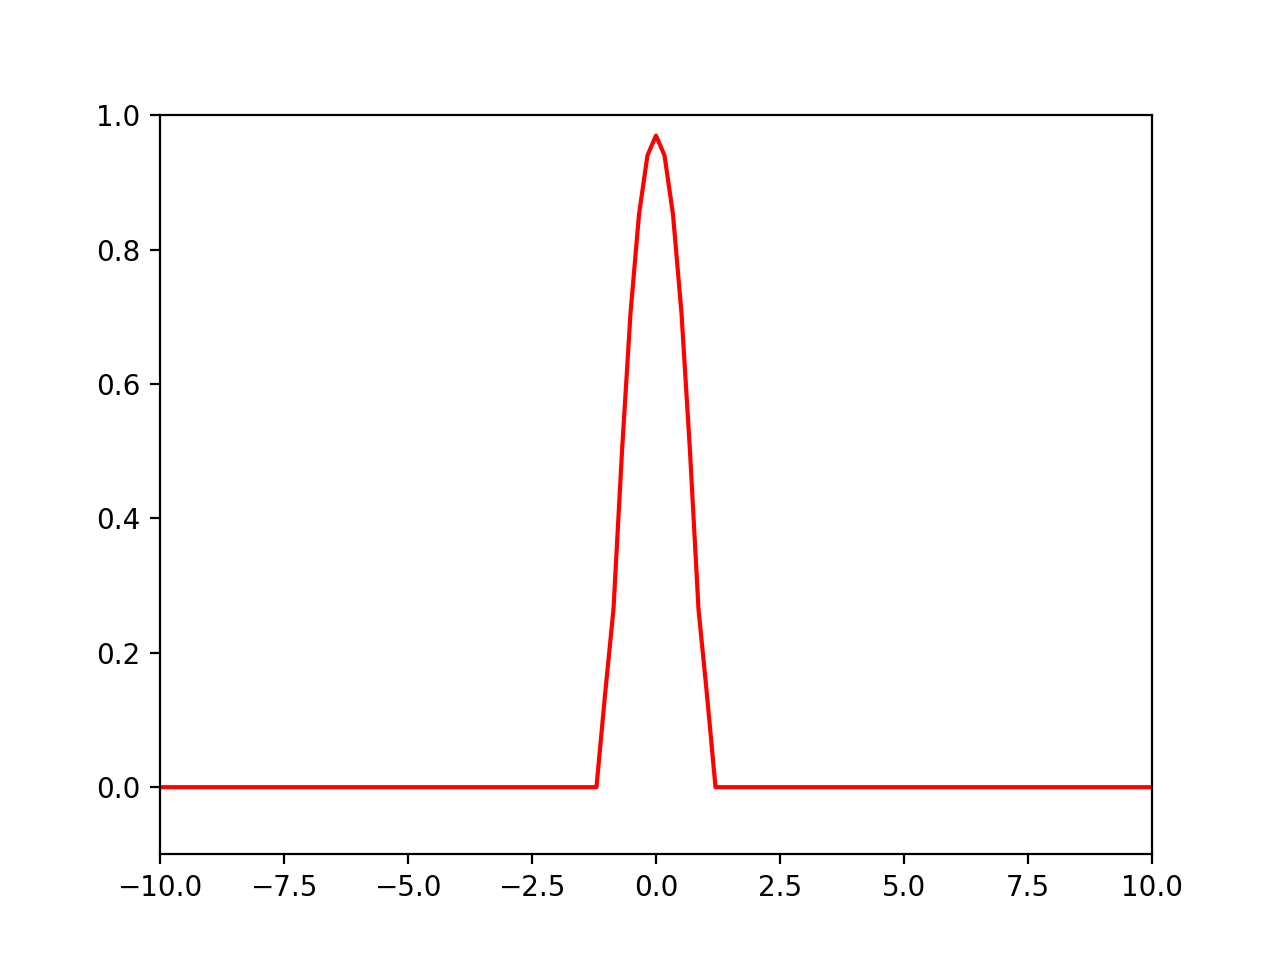

In [128]:
# Animate Problem 2 for t = [0,1] with t-stepsize 66
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-10, 10))
ax.set_ylim((-0.1, 1))
particle, = plt.plot([],[], marker='o', color='r')
traj, = plt.plot([],[], color='r')

def update(i):
    u = ibvp(nu, a, b, T, f, n_x, 66, i)
    traj.set_data(x, u)
    return particle, traj

ani = animation.FuncAnimation(fig, update, frames=range(70), interval=25)
plt.show()

## Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 8.4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [129]:
def Crank_Nicolson(nu, a, b, T, f, n_x, n_t, i):
    """
    Function that solves heat flow equation in one dimension
    with appropriate initial conditions and homogeneous Dirichlet
    boundary conditions. Uses the Crank Nicolson method
    It is of the form:
    u_t = ν*u_xx, x ∈ [a, b], t ∈ [0, T],
    u(a,t) = 0, u(b,t) = 0,
    u(x,0) = f(x)
    
    Parameters:
    nu: float
        ν of the PDE
    a: float
        initial value of x
    b: float
        final value of x
    T: float
        final value of t
    f: callable function
        function f in the equation u(x,0) = f(x)
    n_x: int
        number of x subintervals
    n_t: int
        number of t subintervals
    i: int
        Integer value of the specific time value to return
    
    Returns:
    U_i: ndarray
        array containing x information at timestep i
    """
    i = (n_t + i) % n_t
    x = np.linspace(a, b, n_x + 1)
    t = np.linspace(0, T, n_t + 1)
    h = x[1] - x[0]
    k = t[1] - t[0]
    lmda = nu * k / (2*h**2)
    U = f(x)
    A = sp.diags([lmda, 1-2*lmda, lmda], [-1, 0, 1], shape=(n_x+1, n_x+1))
    B = sp.diags([-lmda, 1+2*lmda, -lmda], [-1, 0, 1], shape=(n_x+1, n_x+1))
    B_inv = np.linalg.inv(B.toarray())
    for j in range(i):
        U = B_inv@A@U
    return U

<IPython.core.display.Javascript object>


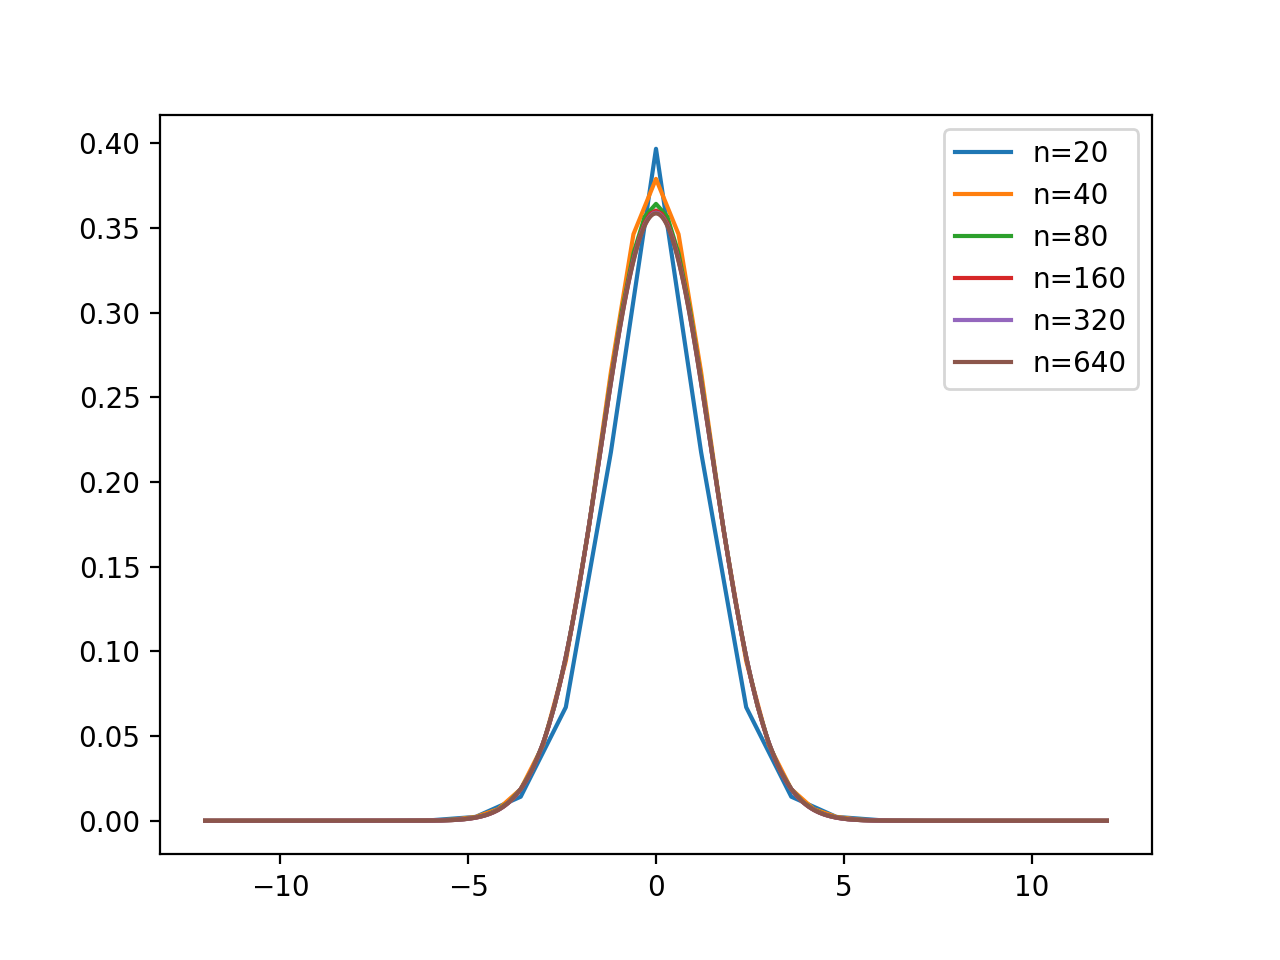

In [130]:
a,b = -12,12
T = 1
f = lambda x: np.maximum(1 - x**2, 0)
nu = 1
# Solve and plot for each solution of the stepsize to demonstrate stability
fig = plt.figure()
for n in [20, 40, 80, 160, 320, 640]:
    u = Crank_Nicolson(nu, a, b, T, f, n, n, -1)
    x = np.linspace(a, b, n+1) 
    plt.plot(x, u, label="n="+str(n))
plt.legend()
plt.show()

In [132]:
# Calculate the error
u = Crank_Nicolson(nu, a, b, T, f, 640, 640, -1)
ym = u[::32]
steps = [20, 40, 80, 160, 320]
errs = []
for i, n in enumerate(steps):
    u = Crank_Nicolson(nu, a, b, T, f, n, n, -1)
    yk = u[::2**i]
    err = np.abs(yk - ym).max()
    errs.append(err)

<IPython.core.display.Javascript object>


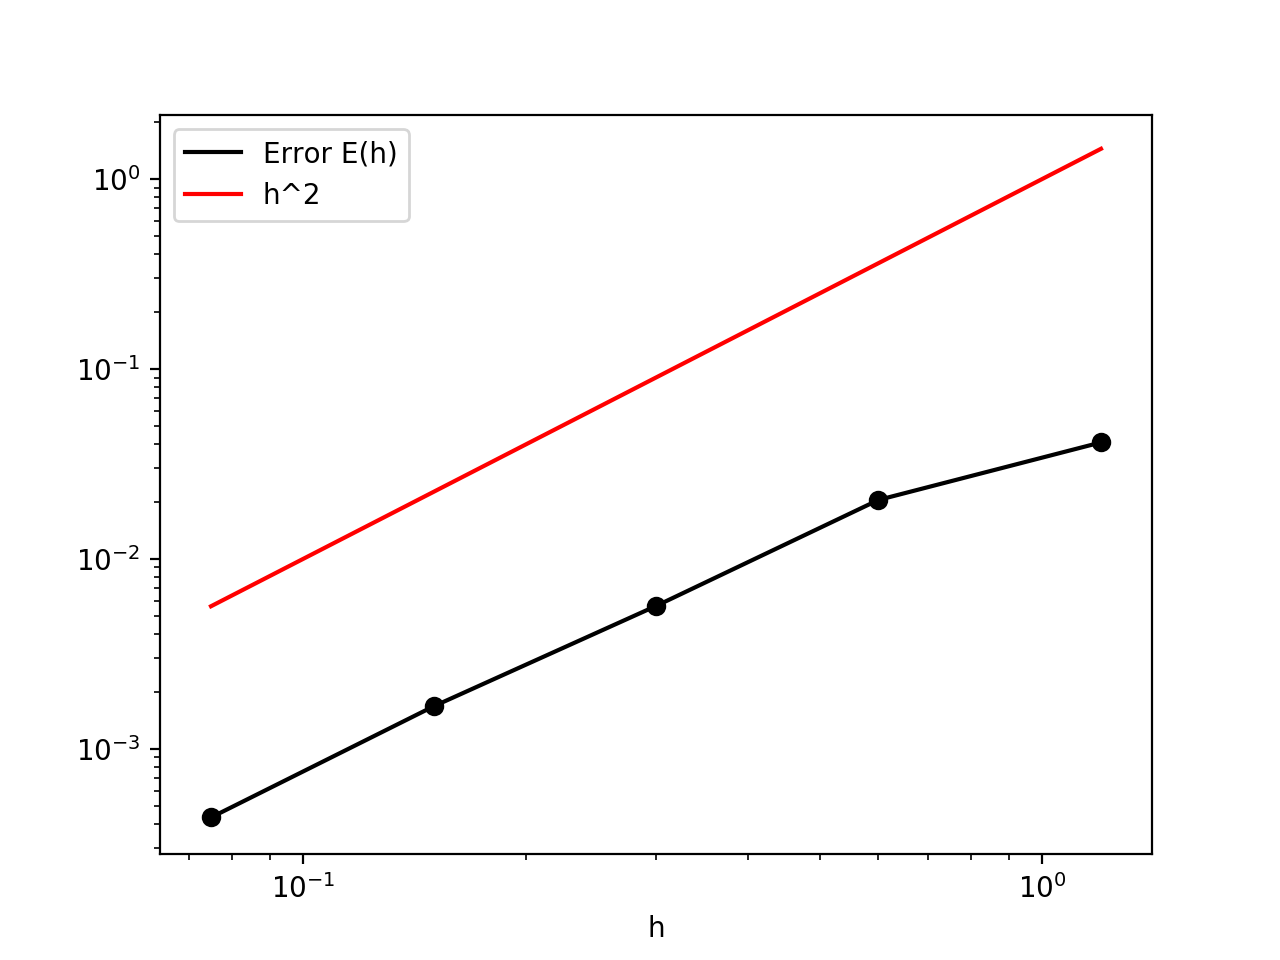

In [133]:
# Plot
h = 24 / np.array(steps)
fig = plt.figure()
plt.loglog(h, errs, color="k", label="Error E(h)")
plt.scatter(h, errs, color="k")
plt.loglog(h, h**2, color="r", label="h^2")
plt.xlabel('h')
plt.legend()
plt.show()